## 双摆锤同化系统
> [本实验引用至雷丁大学的 Ross Bannister 教授的工作](http://www.met.rdg.ac.uk/~ross/DARC/DPVar/DocDPVar.html)

数值天气预报中的数据同化太复杂，需要大量了天气预报的相关知识，才能理解其原理。为了没有天气预报知识的背景的同学快速了解和掌握数据同化技术的思路和原理，我们引入了一个简单的模型-双摆锤系统模型，只需要非常简单的物理知识即可了解其运动过程。与天气预报成千上万个状态参数来描述不同，双摆锤模型只需要4个状态参数，分别是摆锤的两个角度和两个角速度。通过双摆锤模型的同化实验能够更快理解同化系统是怎样运行的和关键的地方在哪里，便于进一步理解同化在数值天气预报和其他方面的应用。

### 双摆锤介绍

双摆锤由两部分组成，在一个固定点挂有质量为$m_1$的摆锤1，摆锤1距离固定点的长度为$l_1$，摆锤1与固定点的连线与垂直方向的夹角记为$\theta_1$，摆锤1下挂摆锤2，摆锤2的质量$m_2$，摆锤1和2的长度为$l_2$，摆锤1与摆锤2之间的连线与垂直方向上的夹角记为$\theta_2$，如下图所示。
<img src="res/dp_system.png" height="400px" width="600px"/>


### 双摆锤系统物理学原理解释

#### 1. 构造拉格朗日量（LAGRANGIAN）
若系统状态能够通过广义坐标x和时间t的函数来描述，则广义坐标关于时间的函数可通过拉格朗日方程解出。根据Newton第二定律，确定了质点系的初始位置和初始速度即可知道保守系系统的演化，则LAGRANGIAN表示为：
$$
L = T - V
$$

其中$T$和$V$分别代表系统的动能和势能, 变量上面带·的代表改变量变化的速率。

$$
\begin{align}
T &= -gm_1l_1\cos\theta_1 - gm_2(l_1\cos\theta_1 + l_2\cos\theta_2) \\
V &= \frac{1}{2}m_1(\dot x_1^2+\dot y_1^2) + \frac{1}{2}m_2(\dot x_2^2+\dot y_2^2)
\end{align}
$$

其中$x,y$代表摆锤的位置，上面带一个点的代表该变量的变化速率，带入即可求出拉格朗日量。

$$
\begin{align}
x_1 &= l_1 \sin \theta_1 \\
y_1 &= -l_1 \cos \theta_1 \\
x_2 &= l_1 \sin \theta_1 + l_2 \sin \theta_2\\
y_2 &= -l_1 \cos \theta_1 - l_2 \cos \theta_2\\
\dot x_1 &= l_1 \cos \theta_1 \dot\theta_1 \\
\dot y_1 &= -l_1 \sin \theta_1 \dot\theta_1 \\
\dot x_2 &= l_1 \cos \theta_1 \dot\theta_1+ l_2 \cos \theta_2\dot\theta_2\\
\dot y_2 &= -l_1 \sin \theta_1 \dot\theta_1- l_2 \sin \theta_2\dot\theta_2
\end{align}
$$


#### 2. 动力学方程
对于每个自由度$i$，均有：
$$
\frac {d}{dt}( \frac{\partial L}{\partial \dot \theta_i}) = \frac{\partial L}{\partial \theta_i}
$$

对t全微分展开,$j = 1,2$：
$$
\sum_j\frac{\partial^2 L}{\partial \dot\theta_i \partial \theta_j}\dot\theta_j + \sum_j\frac{\partial^2L}{\partial \dot \theta_i \partial \dot\theta_j}\ddot\theta_j =  \frac{\partial L}{\partial \theta_i}
$$

令：
$$
A_{ij} = \frac{\partial^2 L}{\partial \dot\theta_i \partial \theta_j} \\
B_{ij} = \frac{\partial^2L}{\partial \dot \theta_i \partial \dot\theta_j}
$$

则：
$$
A\left\lgroup\begin{matrix} \dot\theta_1 \cr \dot\theta_2 \end{matrix}\right\rgroup + B\left\lgroup\begin{matrix} \ddot\theta_1 \cr \ddot\theta_2 \end{matrix}\right\rgroup = \left\lgroup\begin{matrix} {\partial L}/{\partial \theta_1} \cr {\partial L}/{\partial \theta_2} \end{matrix}\right\rgroup
$$


In [5]:
import math
import numpy as np 
import matplotlib.pyplot as plt

# 设置随机数种子
np.random.seed(1357)

In [6]:
"""
拉格朗日系统
"""

# 摆锤1 坐标X
def x1(l1, th1):
    """
    计算摆锤1的坐标X
    :param l1:  锤摆1长度
    :param th1: 锤摆1角度
    :return:  摆锤X坐标
    """
    return l1 * math.sin(th1)

# 摆锤1 坐标Y
def y1(l1, th1):
    """
    计算摆锤1的坐标Y
    :param l1: 锤摆1长度
    :param th1: 锤摆1角度
    :return: 摆锤Y坐标
    """
    return -l1 * math.cos(th1)

# 摆锤2 坐标X
def x2(l1, l2, th1, th2):
    """
    计算摆锤2的坐标X
    :param l1: 锤摆1长度
    :param l2: 锤摆2长度
    :param th1: 锤摆1角度
    :param th2: 锤摆2角度
    :return: 
    """
    return l1 * math.sin(th1) + l2 * math.sin(th2)

# 摆锤2 坐标Y
def y2(l1, l2, th1, th2):
    """
    计算摆锤2的坐标Y
    :param l1: 锤摆1长度
    :param l2: 锤摆2长度
    :param th1: 锤摆1角度
    :param th2: 锤摆2角度
    :return: 
    """
    return -l1 * math.cos(th1) - l2 * math.cos(th2)

# 摆锤1 坐标X变化速率
def x1_dot(l1, th1, th1_rate):
    return l1 * math.cos(th1) * th1_rate

# 摆锤1 坐标Y变化速率
def y1_dot(l1, th1, th1_rate):
    return l1 * math.sin(th1) * th1_rate

# 摆锤2 坐标X变化速率
def x2_dot(l1, th1, th1_rate, l2, th2, th2_rate):
    return l1 * math.cos(th1) * th1_rate +  l2 * math.cos(th2) * th2_rate

# 摆锤2 坐标Y变化速率
def y2_dot(l1, th1, th1_rate, l2, th2, th2_rate):
    return l1 * math.sin(th1) * th1_rate + l2 * math.cos(th2) * th2_rate

# 系统能量
def LAG(m1, m2, l1, l2, th1, th2, th1_rate, th2_rate, g):
    y1_value = y1(l1, th1)
    y2_value = y2(l1, th1, l2, th2)
    x1_rate = x1_dot(l1, th1, th1_rate)
    y1_rate = y1_dot(l1, th1, th1_rate)
    x2_rate = x2_dot(l1, th1, th1_rate, l2, th2, th2_rate)
    y2_rate = y2_dot(l1, th1, th1_rate, l2, th2, th2_rate)
    L = T(m1, m2, x1_rate, y1_rate, x2_rate, y2_rate) - V(m1, m2, g, y1_value, y2_value)
    return L

# 势能
def V(m1, m2, g, y1, y2):
    return m1 * g * y1 + m2 * g * y2

# 动能
def T(m1, m2, x1_rate, y1_rate, x2_rate, y2_rate):
    return 0.5 * (m1 * (x1_rate * x1_rate + y1_rate * y1_rate) + m2 * (x2_rate * x2_rate + y2_rate * y2_rate))

def state2xy(state, l1, l2, m1, m2):
    return x1(l1, state[0]), y1(l1, state[0]),x2(l1, l2 , state[0], state[1]), y2(l1, l2, state[0], state[1])

#### 3. 一阶转换

因为：
$$
A\left\lgroup\begin{matrix} \dot\theta_1 \cr \dot\theta_2 \end{matrix}\right\rgroup + B\left\lgroup\begin{matrix} \ddot\theta_1 \cr \ddot\theta_2 \end{matrix}\right\rgroup = \left\lgroup\begin{matrix} {\partial L}/{\partial \theta_1} \cr {\partial L}/{\partial \theta_2} \end{matrix}\right\rgroup
$$

是二阶的等式，令 $\alpha_{i}=\dot\theta_i$，所以 $\dot\alpha_i=\ddot\theta_i$，因此有：

$$
\frac{d}{dt} 
\left(
\begin{matrix}
\theta_1 \\
\theta_2 \\
\alpha_1 \\
\alpha_2 \\
\end{matrix}
\right) \
= \
\left(
\begin{matrix}
0 & I \\
0 & -B^{-1}A \\
\end{matrix}
\right) \
\left(
\begin{matrix}
\theta_1 \\
\theta_2 \\
\alpha_1 \\
\alpha_2 \\
\end{matrix}
\right) \
+ \
\left(
\begin{matrix}
0 \\
0 \\
B^{-1} 
\left(
\begin{matrix}
\partial L / \partial \theta_1 \\
\partial L / \partial \theta_2 \\
\end{matrix}
\right) \
\end{matrix}
\right) \
$$




In [7]:
def A(th1, th2, al1, al2, m1, m2, l1, l2):
    a11 = -m2 * l1 * l2 * al2 * math.sin(th1 - th2)
    a12 = m2 * l1 * l2 * al2 * math.sin(th1 - th2)
    a21 = -m2 * l1 * l2 * al1 * math.sin(th1 - th2)
    a22 = m2 * l1 * l2 * al1 * math.sin(th1 - th2)
    return np.array([
        [a11, a12],
        [a21, a22]
    ])

def B(th1, th2, al1, al2, m1, m2, l1, l2):
    b11 = (m1 + m2) * l1 * l1
    b12 = m2 * l1 * l2 * math.cos(th1 -th2)
    b21 = m2 * l1 * l2 * math.cos(th1 - th2)
    b22 = m2 * l2 * l2
    
    return np.array([
        [b11,b12],
        [b21,b22]
    ])

def B_inv(th1, th2, al1, al2, m1, m2, l1, l2):
    b11 = (m1 + m2) * l1 * l1
    b12 = m2 * l1 * l2 * math.cos(th1 - th2)
    b21 = m2 * l1 * l2 * math.cos(th1 - th2)
    b22 = m2 * l2 * l2
    
    
    v = (1 / (b11 * b22 - b12 * b21)) * np.array([
        [b22, -b12],
        [-b21, b11]
    ])

    return v

def partial_th1(th1, th2, al1, al2, m1, m2, l1, l2, g):
    return -m2 * l1 * l2 * al1 * al2 * math.sin(th1 - th2) - g * (m1 + m2) * l1 * math.sin(th1)
    
    
def partial_th2(th1, th2, al1, al2, m1, m2, l1, l2, g):
    return m2 * l1 * l2 * al1 * al2 * math.sin(th1 - th2) - g * m2 * l2 * math.sin(th2)

def F(th1, th2, al1, al2, m1, m2, l1, l2, g):
    I = np.eye(2,2)
    Z = np.zeros((2,2))
    mat_B_inv = B_inv(th1, th2, al1, al2, m1, m2, l1, l2)
    mat_A = A(th1, th2, al1, al2, m1, m2, l1, l2)
    par_th1 = partial_th1(th1, th2, al1, al2, m1, m2, l1, l2, g)
    par_th2 = partial_th2(th1, th2, al1, al2, m1, m2, l1, l2, g)
    tb = np.matmul(-mat_B_inv, mat_A)
    scale_mat = np.matmul(np.array([
        [0 , 0, 1, 0],
        [0 , 0, 0, 1],
        [0 , 0, tb[0][0], tb[0][1]],
        [0 , 0, tb[1][0], tb[1][1]],
    ]) , np.array([th1, th2 , al1, al2]).transpose())
    
    b = np.matmul(mat_B_inv, np.array([par_th1, par_th2]).transpose())
    offset_mat = np.array([0,0,b[0], b[1]])
    
    return scale_mat + offset_mat
    
def deg2rad(deg):
    """
    角度转换为弧度
    :param deg: 角度，单位度
    :return: 
    """
    return deg * math.pi / 180.0

def map2pi(rad):
    """
    弧度转化，把不在[-PI, PI]内的弧度转化为[-PI, PI]
    :param rad: 
    :return: 
    """
    if rad < -math.pi:
        return rad + 2 * math.pi
    elif rad > math.pi:
        return rad - 2 * math.pi
    return rad

#### 4. 龙格库塔求解


In [8]:
def runge_kutt_4(th1, th2, al1, al2, m1, m2, l1, l2, g, dt):
    state = [th1, th2, al1, al2]
    # stage 1 
    state1 = state
    k1 = F(state1[0],state1[1],state1[2],state1[3], m1, m2, l1, l2, g) * dt
    #stage 2
    state2 = k1 / 2 + state
    k2 = F(state2[0],state2[1],state2[2],state2[3], m1, m2, l1, l2, g) * dt
    
    #stage 3
    state3 = k2 / 2 + state
    k3 = F(state3[0],state3[1],state3[2],state3[3], m1, m2, l1, l2, g) * dt
    
    #stage 4
    state4 = k3 + state
    k4 = F(state4[0],state4[1],state4[2],state4[3], m1, m2, l1, l2, g) * dt
    
    # calc y
    state_dt = state + k1 / 6 + k2 / 3 + k3 / 3 + k4 / 6
    

    # 限制在 -pi 到 pi 之间
    state_dt[0] = map2pi(state_dt[0])
    state_dt[1] = map2pi(state_dt[1])
    
    return state_dt
    pass


### 参数配置信息
包含三个部分：
- 通用参数： 定义了运行模式，初始位置状态，双摆锤基础参数（摆轴长，锤质量，重力加速度，时间步长，积分时间）
- MakeObs相关参数：定义了观测频率，观测噪声
- Analyse相关参数：定义了观测窗口时间，观测值


In [9]:
# --Status ('MakeObs' to invent observations, 'Analyse' to do 4dVar)
mode = "MakeObs"
# Dimensions of pendulum (l1,l2,l3, metres)
l1 = 0.1
l2 = 0.2
l3 = 0.15
# Masses of pendulum nodes (m1,m2,m3, kg)
m1 = 0.1
m2 = 0.1 
m3 = 0.1
# Acceleration due to gravity (m/s/s)
g = 10.0
# Time step (seconds)
time_step = 0.001
#Frequency of observation output (used only for MakeObs)
obs_freq = 50
# Length of integration (time steps)
length_of_integration = 5000
# Model state (initial guess(Analyse) or initial conditions(MakeObs)) angle 1,angle 2, roc angle 1, roc angle 2 (deg and deg/s)
angle1 = 160.0
angle2 = 100.0
roc_angle1 = -350.0
roc_angle2 = 100.0

#Noise for angles (deg, used only for MakeObs)
noise_pos = 5.0
#Noise for roc angles (deg/s used only for MakeObs)
noise_vel = 0.0

# Size of each observation window (time steps)
obs_window = 500

In [10]:
# 测试拉格朗日计算
#print(LAG(m1, m2, l1, l2, deg2rad(angle1), deg2rad(angle2), deg2rad(roc_angle1), deg2rad(roc_angle2), g))
#print(F( deg2rad(angle1), deg2rad(angle2), deg2rad(roc_angle1), deg2rad(roc_angle2), m1, m2, l1, l2, g ))

s = [deg2rad(angle1), deg2rad(angle2), deg2rad(roc_angle1), deg2rad(roc_angle2)]
#print(s)
print(runge_kutt_4(deg2rad(angle1), deg2rad(angle2), deg2rad(roc_angle1), deg2rad(roc_angle2), m1, m2, l1, l2, g, time_step))

[ 2.78640648  1.74706098 -6.13206198  1.71817166]


In [11]:
def make_obs(th1, th2, al1, al2, m1, m2, l1, l2, noi_pos, noi_vel, g, dt, times  ):
    state = [th1, th2, al1, al2]
    sarr = []
    for i in range(0,times):
        sarr.append(state)
        state = runge_kutt_4(state[0],state[1],state[2],state[3], m1, m2, l1, l2, g, dt)
    return sarr
    pass

def make_obs_for_assmi(th1, th2, al1, al2, m1, m2, l1, l2, noi_pos, noi_vel, g, dt, times, freq):
    state = [th1, th2, al1, al2]
    sarr = []
    for i in range(0,times):
        state = runge_kutt_4(state[0],state[1],state[2],state[3], m1, m2, l1, l2, g, dt)
        if i % 50 == 0:
            obs = []
            obs.append(i)
            obs.append(state[0] + 2 * (np.random.rand() - 0.5) * noi_pos)
            obs.append(state[1]+ 2 * (np.random.rand() - 0.5) * noi_pos)
            obs.append(noi_pos)
            
            sarr.append(obs)
            
    return sarr
    pass

In [12]:
sarr = make_obs(deg2rad(angle1), deg2rad(angle2), deg2rad(roc_angle1), deg2rad(roc_angle2),
               m1, m2, l1, l2, deg2rad(noise_pos), deg2rad(noise_vel), g, time_step, length_of_integration )

oarr = make_obs_for_assmi(deg2rad(angle1), deg2rad(angle2), deg2rad(roc_angle1), deg2rad(roc_angle2),
               m1, m2, l1, l2, deg2rad(noise_pos), deg2rad(noise_vel), g, 
                          time_step, int(length_of_integration * 0.4), obs_freq)

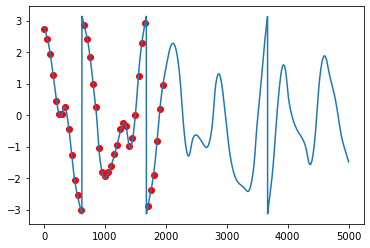

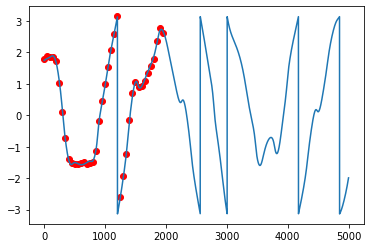

In [13]:
plt.plot(range(0, len(sarr)), [s[0] for s in sarr])
plt.scatter([s[0] for s in oarr] ,[s[1] for s in oarr], color='r')
plt.show()

plt.plot(range(0, len(sarr)), [s[1] for s in sarr])
plt.scatter([s[0] for s in oarr] ,[s[2] for s in oarr], color='r')
plt.show()

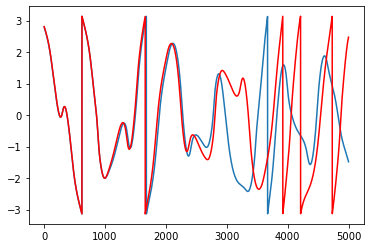

In [14]:
sarr1 = make_obs(deg2rad(angle1 +1), deg2rad(angle2), deg2rad(roc_angle1), deg2rad(roc_angle2),
               m1, m2, l1, l2, deg2rad(noise_pos), deg2rad(noise_vel), g, time_step, length_of_integration )

plt.plot(range(0, len(sarr)), [s[0] for s in sarr])
plt.plot(range(0, len(sarr1)), [s[0] for s in sarr1], color='r')
plt.show()

### 损失函数

损失函数由两部分组成，$J_B$衡量与背景的差异，$J_O$衡量与观测的差异。公式如下：

$$
\begin{align}
J[x] &= \frac{1}{2}(x_B-x)^TB^{-1}(x_B-x) + \frac{1}{2}\sum_{t=0}^{\Delta t}(y(t)-H_t^o[x(t)])^TE^{-1}(y(t)-H_t^o[x(t)]) \\
&=J_B + J_O
\end{align}
$$

- $x_B$：表示背景场的状态，
- $x$：表示估计出来的系统状态，通常为模型输出
- $y(t)$：表示t时刻的观测值
- $x(t)$：表示t时刻的估计状态
- $H_t^o$：表示观测算子，因为模型估计状态与观测状态不一定可以相互比较，需要进行转换
- $H_t^o[x(t)]$：表示将模型输出状态换后可以与观测状态可比较的状态量
- $E$：观测误差协方差矩阵
- $B$：背景误差协方差矩阵

$J_B$和$J_O$形式上类似，分别用于衡量背景误差和观测误差。
其中协方差$B$和$E$用于衡量被估计的量对系统误差的贡献，整项乘积即代表系统误差。

#### 背景场计算

同化系统开始时，背景状态量为初始值；\
同化系统正在运行时，背景状态量为上一个窗口的最后的状态；

In [15]:

def background(s0, s):
    '''
    获取背景状态量
    
    s0: 窗口初始状态量
    s: 前一个窗口的状态量，窗口状态量
    '''
    
    if len(s) == 0:
        return s0
    
    return s[len(s) - 1]
        


#### 计算当前窗口中所有的状态值

In [16]:
def forward_model(initial_state, times, dt, m1, m2, l1, l2, g):
    '''
    计算窗口各时刻的状态量，initial_state中角度都为弧度，需提前转换
    
    initial_state: 窗口初始状态量
    times: 模拟总步长
    dt: 时间步长
    '''
    sarr = []
    state = initial_state
    for i in range(0,times):
        sarr.append(state)
        state = runge_kutt_4(state[0],state[1],state[2],state[3], m1, m2, l1, l2, g, dt)
        
    return sarr

def calc_background(bg_state, bg_true):
    """
    bg_state: 背景场状态
    bg_true: 背景场真值，用窗口均值替代
    """
    return np.matmul(bg_state - bg_true, (bg_state - bg_true).transpose())

def calc_background_true(states_in_window):
    """
    利用窗口内的均值作为真值
    states_in_window：窗口内所有时刻的状态
    """
    return np.mean(states_in_window, axis = 0)

def calc_background_inverse(bg_co_mat):
    """
    求Background的逆
    background：背景协方差矩阵
    """
    return np.linalg.inv(bg_co_mat)


#Gradient Function
def gradient_f(x, f):
    assert (x.shape[0] >= x.shape[1]), "the vector should be a column vector"
    x = x.astype(float)
    N = x.shape[0]
    gradient = []
    for i in range(N):
        eps = abs(x[i]) *  np.finfo(np.float32).eps 
        xx0 = 1. * x[i]
        f0 = f(x)
        x[i] = x[i] + eps
        f1 = f(x)
        gradient.append(np.asscalar(np.array([f1 - f0]))/eps)
        x[i] = xx0
    return np.array(gradient).reshape(x.shape)

#Hessian Matrix
def hessian (x, the_func):
    N = x.shape[0]
    hessian = np.zeros((N,N)) 
    gd_0 = gradient_f( x, the_func)
    eps = np.linalg.norm(gd_0) * np.finfo(np.float32).eps 
    for i in range(N):
        xx0 = 1.*x[i]
        x[i] = xx0 + eps
        gd_1 =  gradient_f(x, the_func)
        hessian[:,i] = ((gd_1 - gd_0)/eps).reshape(x.shape[0])
        x[i] =xx0
    return hessian

def get_obs_in_cycle(obs, st, et):
    obs_in_cycle = []
    
    for o in obs:
        
        if o[0] >= st and o[0] < et:
            obs_in_cycle.append(o)
    
    return obs_in_cycle


def find_model_state_match_obs(model_state, obs_state):
    match_state = []
    
    for os in obs_state:
        for ms in model_state:
            if os[0] == ms[0]:
                match_state.append(ms)
                
    return match_state
        

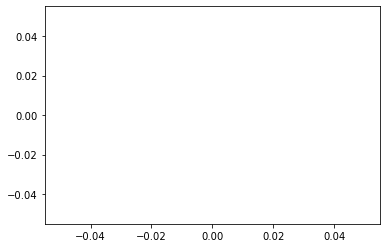

In [18]:
marr = find_model_state_match_obs(sarr, oarr)

plt.scatter([s[0] for s in marr] ,[s[2] for s in marr], color='b')
plt.scatter([s[0] for s in oarr] ,[s[2] for s in oarr], color='r')
plt.show()

In [24]:
import numpy as np

def J(x):
    return J_O(x) + J_B(x)
    pass

def J_O(x):
    pass

def J_B(states_in_window, bg_state, bg_co_mat_inv ):
    """
    计算背景的损失
    """
    return np.matmul(np.matmul(bg_state - states_in_window, bg_co_mat_inv), bg_state - states_in_window)
    
    pass



#### 同化过程

In [ ]:
def assim_4dvar(initial_state, obs_states, window_size, total_steps, dt):
    '''
    同化过程主函数
    
    initial_state: 初始状态
    
    '''
    # 运行时状态
    running_state = []
    
    # 循环迭代次数
    cycles = int(total_steps / window_size)
    if total_steps % window_size  > 0:
        cycles += 1
    
    for i in range(0, cycles):
    
        # step1: 设置背景状态
        bg_state = background(initial_state, running_state)

        # 设置线性状态
        linear_state = bg_state

        # 获取cycle内的观测状态
        obs_in_cycle = get_obs_in_cycle(obs_states, window_size * i, window_size * i + window_size - 1)
        
        # 当有观测的时候需要计算观测的误差
        if len(obs_in_cycle) > 0:
            
            # 背景摄动
            diff_bg_state = bg_state - linear_state
            
            # 通过前向模式获取当前窗口中所有时刻状态
            state_in_cycle = forward_model(linear_state, window_size, dt, m1, m2, l1, l2, g)
            
            # 获取与与观测时间相匹配的模型输出数据
            match_state_in_cycle = find_model_state_match_obs(state_in_cycle, obs_in_cycle)
        
            

In [ ]:
### 前向模式


### 前向模式


### 反向模式 

$$ C = \{w_1, w_2, w_3, ..., w_{N}\}$$
语料中长度为s的n-gram可以用一个序列$g_s$来表示 $$ g_s = w_iw_{i+1}...w_{i+s} \in G_s, i \in [0, N - s ] $$
$G_s$表示语料C中所有长度为s的ngrame的集合，大小为$L_s = N - s$。\
把$g_s$分为两部分，分别用$a$和$b$表示。
$$
G_s = concat\{a, b\} \\
a = w_i w_{i+1}... w_{k-1} \\
b = w_k, w_{k+1}...w_{i + s} \\
k \in (i, i + s)$$

$g_s | a_{g_s} = \dot a $ 表示长度为s的ngram可以$\dot a$为前缀 \
$g_s | b_{g_s} = \dot b $ 表示长度为s的ngram可以$\dot b$为结尾 \

$f_a^s = Count(g_s | a_{g_s} = a)$ \
$f_b^s = Count(g_s | b_{g_s} = b)$ \
$f_{ab}^s = Count(g_s | g_s = g_{ab})$

针对每一个g_s有，存在一组$\hat a_{gs}, \hat b_{gs}$ $g_s = Concat\{\hat a_{gs}, \hat b_{gs}\}$ 使得 $MP_{gs}$ 最小,

$PATI_{gs} = MP_{gs} X AT_{gs} X F_{gs} $ , PS，这里要判断，MP最小 PATI是否是最小，如果是，就说取PATI在gs下的最小值，如果不是就按MP最小来说


